# Read the Weather Data

In [2]:
"""
Created on Fri Mar  6 15:52:30 2020

@author: Saniya Khan
"""

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

weather=pd.read_csv("Weather_formatted_convert.csv")
weather=weather[['Day','T.Max(oC)','T.Min(oC)','Rain (mm)','Evap(mm)','Radn(MJ/m2)','VP (hPA)','RHmaxT(%)','RHminT(%)','Date2(mmddyyyy)','Brigade','Latitude','Longitude']]
weather.rename(columns={"Date2(mmddyyyy)":"Date"},errors="raise",inplace = True)
weather['Date']=pd.to_datetime(weather['Date'])

# Set Date as Timeseries index

In [3]:
print(weather.isnull().sum())
weather=weather.set_index('Date')
y=weather['T.Max(oC)'].resample('M').mean()

Day            0
T.Max(oC)      0
T.Min(oC)      0
Rain (mm)      0
Evap(mm)       0
Radn(MJ/m2)    0
VP (hPA)       0
RHmaxT(%)      0
RHminT(%)      0
Date           0
Brigade        0
Latitude       0
Longitude      0
dtype: int64


In [4]:
# Plot Tmax

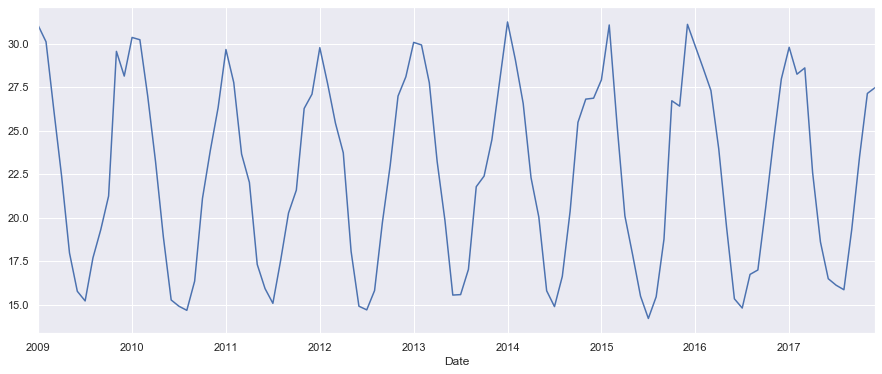

In [5]:
sns.set()
ax1 = plt.subplots()
#ax1.set_xlabel('Date')
y.plot(figsize=(15,6))


count    108.000000
mean      10.526153
std        3.576656
min        4.453244
25%        7.229657
50%       10.238824
75%       13.658829
max       16.331728
Name: T.Min(oC), dtype: float64


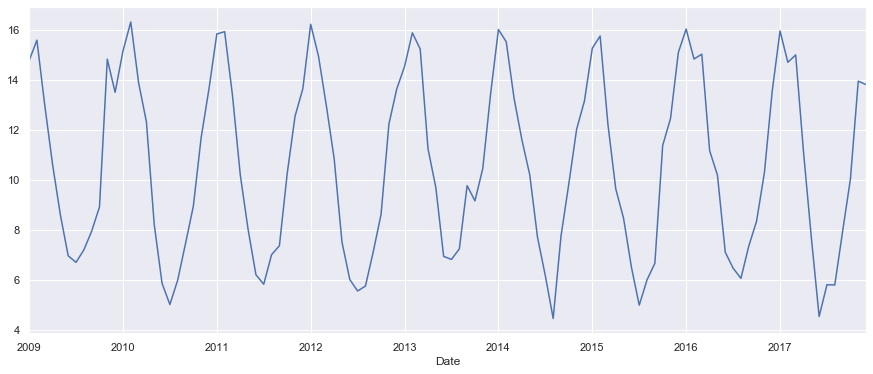

In [6]:
y1=weather['T.Min(oC)'].resample('M').mean()
y1.plot(figsize=(15,6))
print(y1.describe())

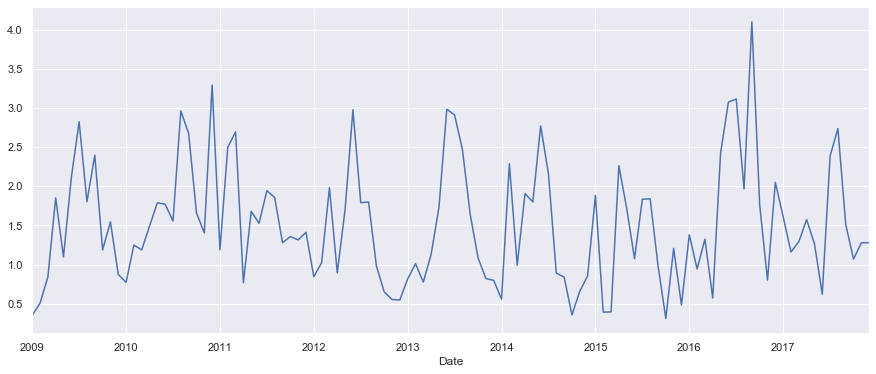

In [7]:
y2=weather['Rain (mm)'].resample('M').mean()
y2.plot(figsize=(15,6))

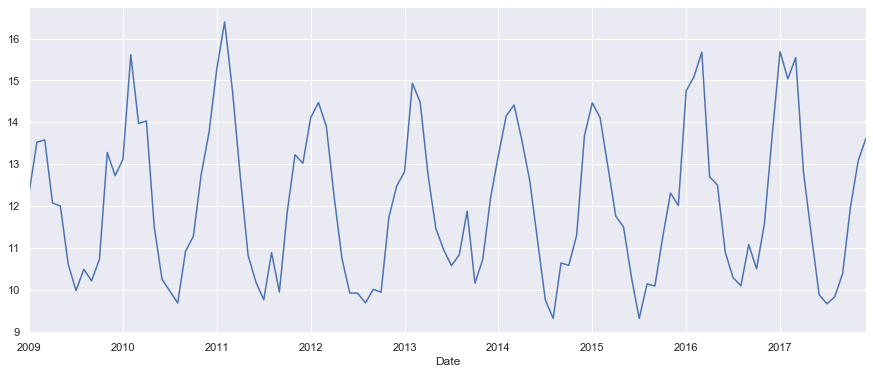

In [8]:
y3=weather['VP (hPA)'].resample('M').mean()
y3.plot(figsize=(15,6))

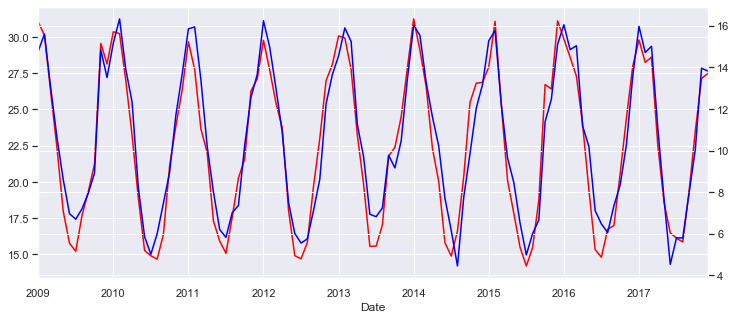

In [9]:
plt.figure(figsize=(12,5))
y.name="Tmax"
y.plot(color='red', grid=True)
y1.name="Tmin"
y1.plot(color='blue',grid=True, secondary_y=True)


In [10]:
data=[y,y1]
weather_summary=pd.DataFrame(data,columns=['Tmax','Tmin'])
print(data)

[Date
2009-01-31    31.044763
2009-02-28    30.110955
2009-03-31    26.176090
2009-04-30    22.354120
2009-05-31    17.970460
                ...    
2017-08-31    15.853268
2017-09-30    19.312172
2017-10-31    23.498248
2017-11-30    27.139638
2017-12-31    27.479838
Freq: M, Name: Tmax, Length: 108, dtype: float64, Date
2009-01-31    14.775523
2009-02-28    15.602394
2009-03-31    13.009847
2009-04-30    10.630025
2009-05-31     8.606319
                ...    
2017-08-31     5.796545
2017-09-30     7.942634
2017-10-31    10.040957
2017-11-30    13.960799
2017-12-31    13.822035
Freq: M, Name: Tmin, Length: 108, dtype: float64]


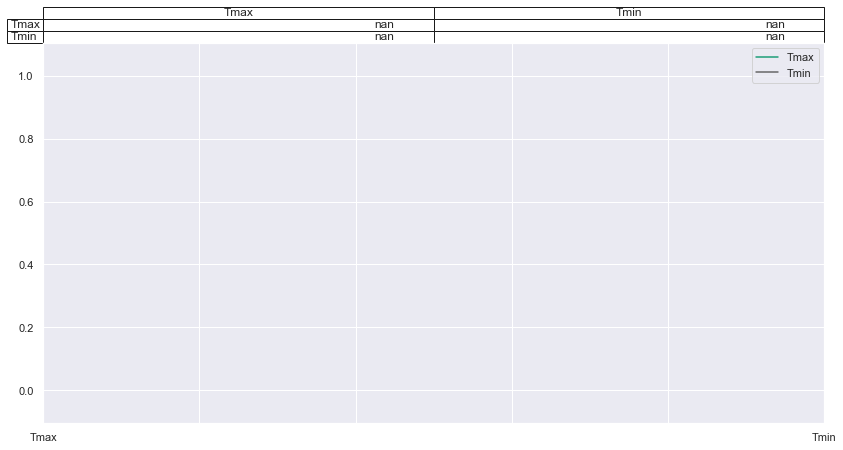

In [11]:
ax=weather_summary.plot(colormap="Dark2",figsize=(14,7))
ax.table(cellText=weather_summary.values,
         rowLabels=weather_summary.index,colLabels=weather_summary.columns,loc="top")

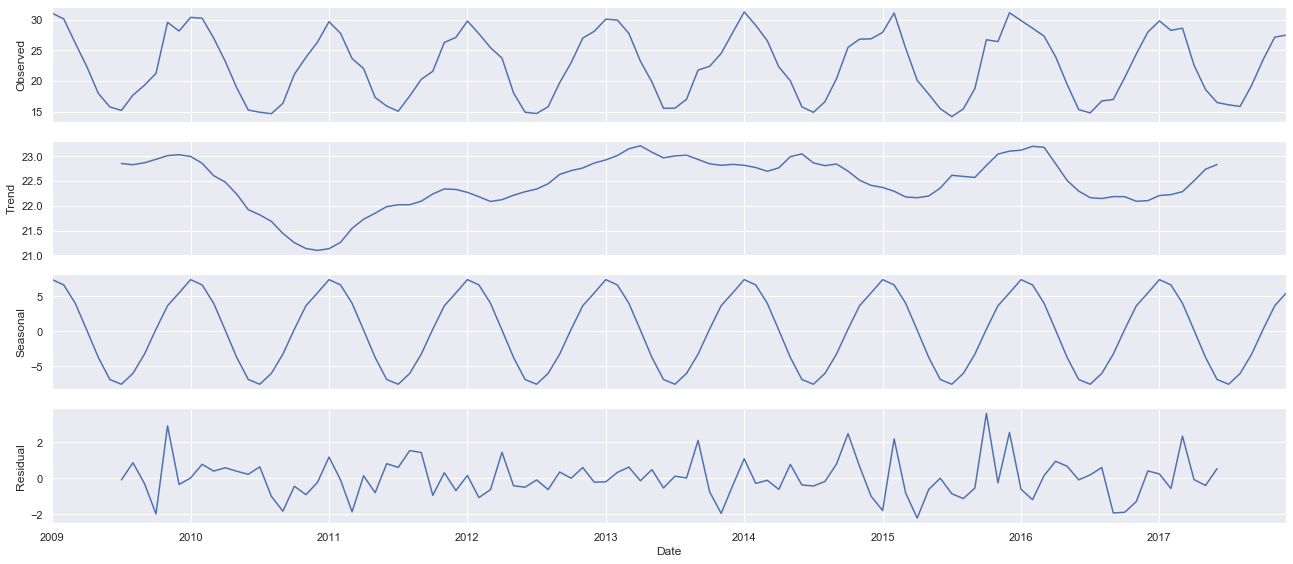

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()#overall upward trend in max temp

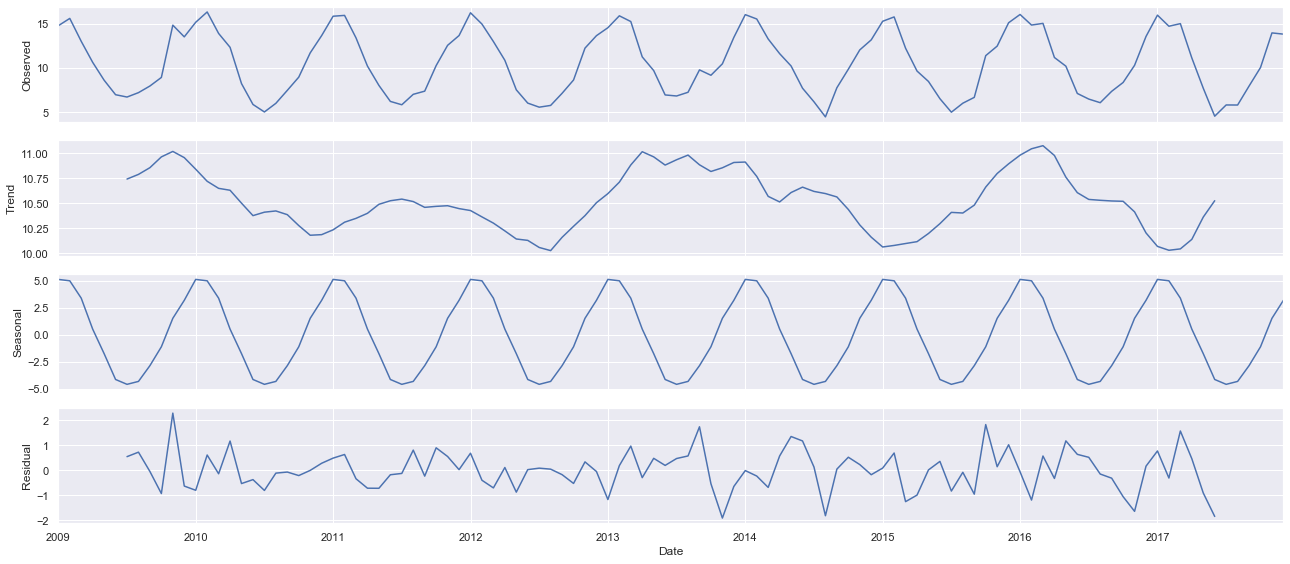

In [13]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
fig = decomposition.plot()
plt.show()

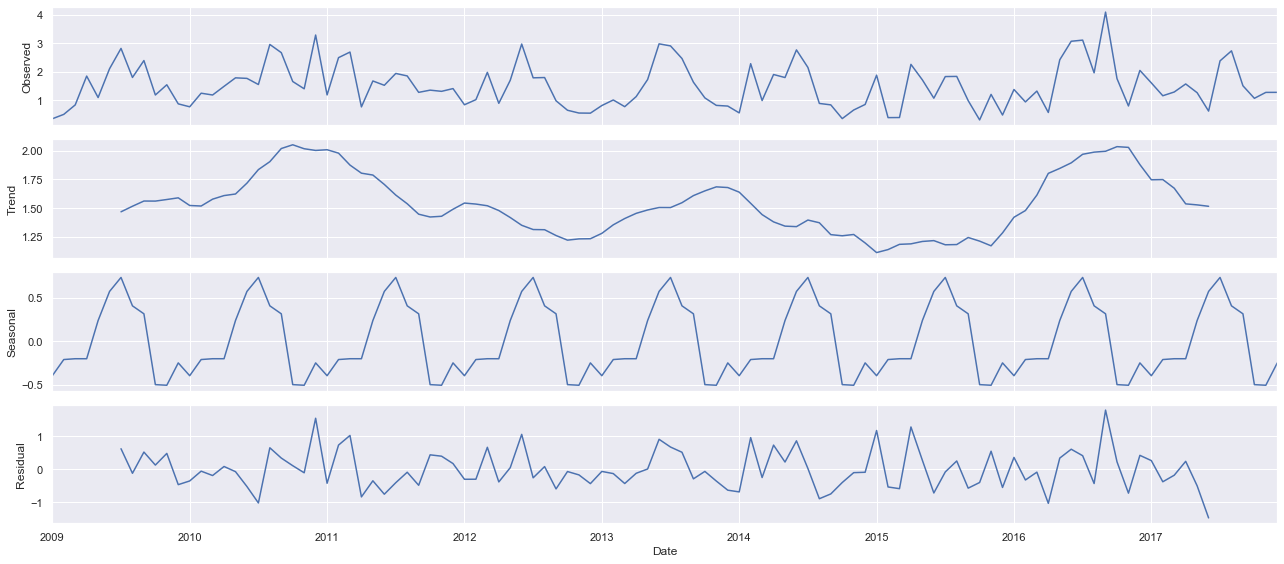

In [14]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2, model='additive')
fig = decomposition.plot()
plt.show()

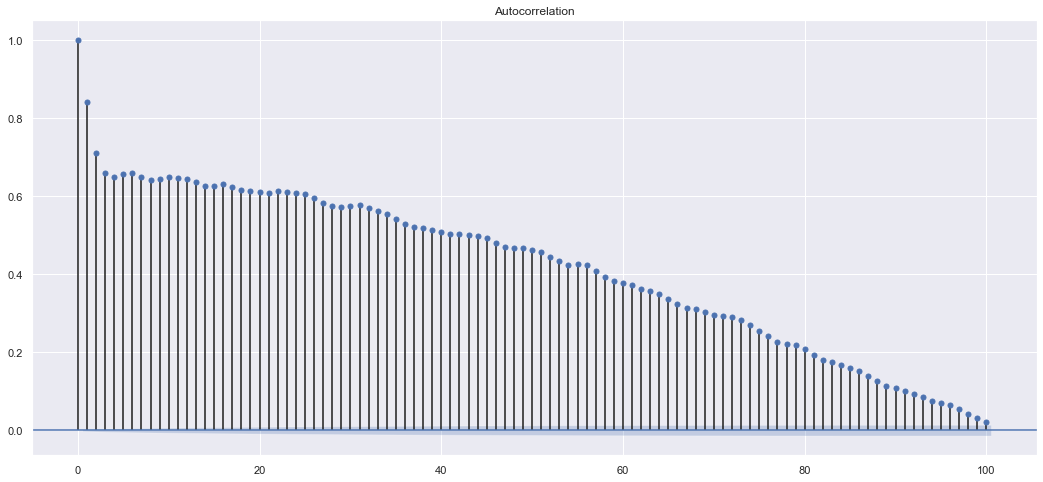

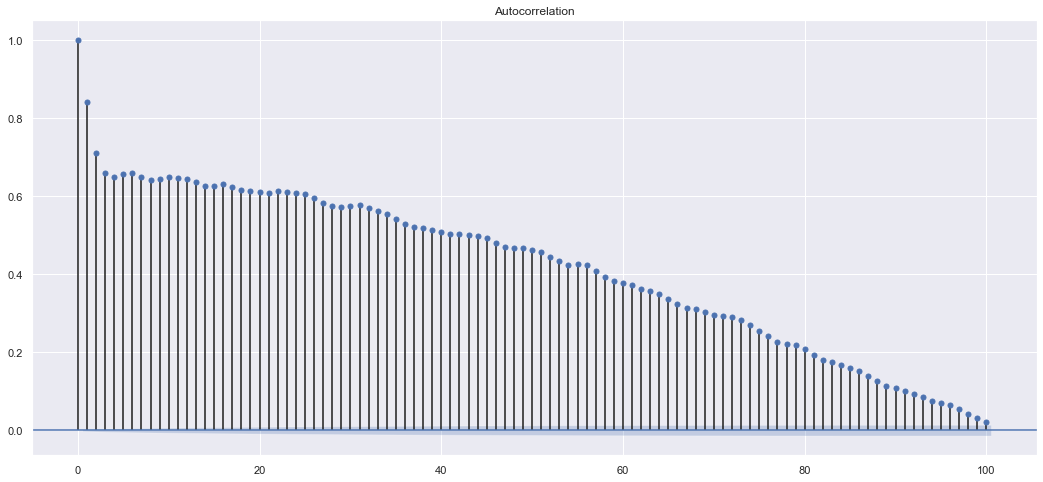

In [27]:
#plot acf for max temp
#weather.iloc[:,[1]]
maxtemp=weather.iloc[:,[1]]
plot_acf(maxtemp,lags=100,alpha=0.05)